<a href="https://colab.research.google.com/github/msrepo/ml-mscise-2023/blob/master/Dimensionality_Reduction/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow as tf
from tensorflow import keras

import os
import time
import numpy as np
import glob
import imageio
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib


In [2]:
np.random.seed(0)

In [6]:
(train_images, train_labels),(test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

# partition training into train and validation set
NUM_VAL = 5000
X_train, X_val = train_images[:-NUM_VAL], train_images[-NUM_VAL:]
y_train, y_val = train_labels[:-NUM_VAL], train_labels[-NUM_VAL:]


In [17]:
from sklearn.manifold import TSNE

def plot_embeddings_tsne(X_data, y_data, encodings):
  tsne = TSNE()
  X_data_2d = tsne.fit_transform(encodings)
  X_data_2d = (X_data_2d - X_data_2d.min()) / (X_data_2d.max() - X_data_2d.min())

  plt.figure(figsize=(10,8))
  cmap = plt.cm.tab10
  plt.scatter(X_data_2d[:, 0], X_data_2d[:, 1], c=y_data, s=10, cmap=cmap)
  image_positions = np.array([[1.0, 1.0]])
  for idx, pos in enumerate(X_data_2d):
    dist = np.sum((pos - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
      image_positions = np.r_[image_positions, [pos]]
      imagebox = matplotlib.offsetbox.AnnotationBbox(
          matplotlib.offsetbox.OffsetImage(X_data[idx], cmap='binary'),
          pos,
          bboxprops={'edgecolor': cmap(y_data[idx]), 'lw':2},
      )
      plt.gca().add_artist(imagebox)
  plt.axis('off')


In [12]:
def plot_image(image):
  plt.imshow(image, cmap='binary')
  plt.axis('off')

def show_reconstructions(model, images=X_val, n_images=5):
  reconstructions = model.predict(images[:n_images])
  plt.figure(figsize=(n_images * 1.5, 3))
  for image_idx in range(n_images):
    plt.subplot(2, n_images, 1 + image_idx)
    plot_image(images[image_idx])
    plt.subplot(2, n_images, 1 + n_images + image_idx)
    plot_image(reconstructions[image_idx])

In [19]:
tf.random.set_seed(42)
np.random.seed(42)

stacked_encoder = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(100, activation='relu'),
     keras.layers.Dense(30, activation='relu')
    ]
)

stacked_decoder = keras.models.Sequential(
    [
     keras.layers.Dense(100,activation='relu',input_shape=[30]),
     keras.layers.Dense(28*28, activation='sigmoid'),
     keras.layers.Reshape((28,28))
    ]
)

stacked_ae = keras.models.Sequential((stacked_encoder, stacked_decoder))
stacked_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=0.1), metrics = [keras.metrics.binary_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=15,validation_data=(X_val, X_val))

Epoch 1/15


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1719/1719 [==============================] - 6s 3ms/step - loss: 0.3568 - binary_accuracy: 0.7400 - val_loss: 0.2669 - val_binary_accuracy: 0.7951
Epoch 2/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2639 - binary_accuracy: 0.7950 - val_loss: 0.2593 - val_binary_accuracy: 0.7937
Epoch 3/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2507 - binary_accuracy: 0.7949 - val_loss: 0.2405 - val_binary_accuracy: 0.7949
Epoch 4/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2325 - binary_accuracy: 0.7936 - val_loss: 0.2230 - val_binary_accuracy: 0.7942
Epoch 5/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2149 - binary_accuracy: 0.7945 - val_loss: 0.2059 - val_binary_accuracy: 0.7955
Epoch 6/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2016 - binary_accuracy: 0.7957 - val_loss: 0.1957 - val_binary_accuracy: 0.7969
Epoch 7/15
1719/1719 [==============================] - 6s 3ms/

1/1 [==============================] - 0s 57ms/step


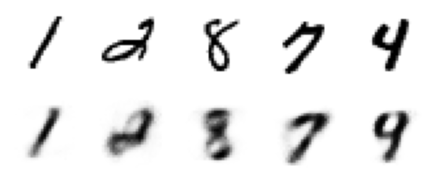

In [20]:
show_reconstructions(stacked_ae)

157/157 [==============================] - 0s 910us/step


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


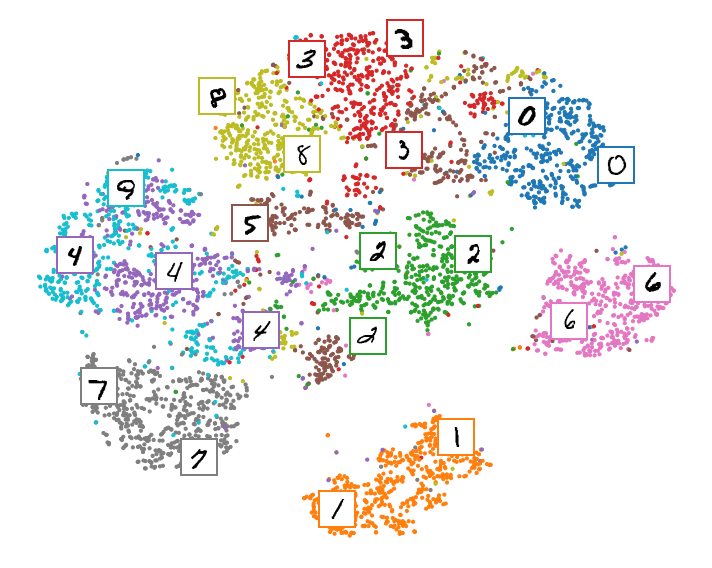

In [21]:
Z = stacked_encoder.predict(X_val)
plot_embeddings_tsne(X_val, y_val, Z)
plt.tight_layout()
plt.show()

157/157 [==============================] - 0s 943us/step


/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


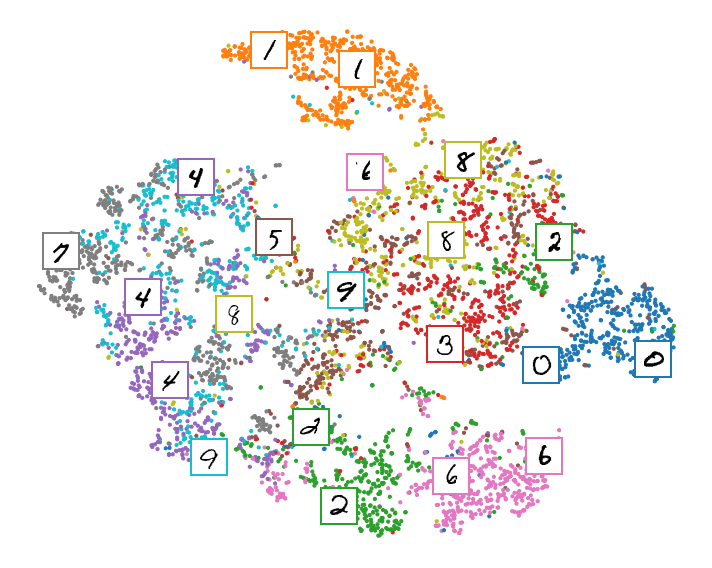

In [18]:
Z = stacked_encoder.predict(X_val)
plot_embeddings_tsne(X_val, y_val, Z)
plt.tight_layout()
plt.show()

**CNN**

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential(
    [
     keras.layers.Reshape([28,28,1], input_shape=(28,28)),
     keras.layers.Conv2D(16, kernel_size=3, padding='SAME', activation='relu'),
     keras.layers.MaxPool2D(pool_size=2),
     keras.layers.Conv2D(32, kernel_size=3, padding='SAME', activation='relu'),
     keras.layers.MaxPool2D(pool_size=2),
     keras.layers.Conv2D(64, kernel_size=3, padding='SAME', activation='relu'),
     keras.layers.MaxPool2D(pool_size=2)
    ]
)

conv_decoder = keras.models.Sequential(
    [
        keras.layers.Conv2DTranspose(
            32, kernel_size=3, strides=2, padding='valid', activation='relu', input_shape=(3,3,64)),
      keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding='SAME', activation='relu'),
     keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding='SAME', activation='sigmoid'),
     keras.layers.Resahpe((28,28))
    ]
)

conv_ae = keras.models.Sequential((conv_encoder, conv_decoder))
conv_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=0.1))